In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [2]:
store_data =  pd.read_csv('C:/Users/Desktop/SGH/Project/walmart_data/stores.csv')
store_data.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [3]:
store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [4]:
store_data['Type'].value_counts()

Type
A    22
B    17
C     6
Name: count, dtype: int64

In [5]:
features_data =  pd.read_csv('C:/Users/Desktop/SGH/Project/walmart_data/features.csv')
features_data.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [6]:
features_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [7]:
train_data =  pd.read_csv('C:/Users/Desktop/SGH/Project/walmart_data/train.csv')
test_data =  pd.read_csv('C:/Users/Desktop/SGH/Project/walmart_data/test.csv')

In [8]:
train_data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [9]:
test_data.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [10]:
train_data.isna().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [11]:
test_data.isna().sum()

Store        0
Dept         0
Date         0
IsHoliday    0
dtype: int64

#### now for analysing the data we need to merge feature_data with store_date
#### and merged feature_data with train and test data

In [12]:
merged_feature = features_data.merge(store_data , how = 'left' , on = 'Store')
merged_feature.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315


In [13]:
merged_feature.isna().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
Type               0
Size               0
dtype: int64

In [14]:
train_data.IsHoliday.value_counts()

IsHoliday
False    391909
True      29661
Name: count, dtype: int64

In [15]:
def merging_data(data):
    merged_date = data.merge(merged_feature , how = 'left' , on = ['Store','Date','IsHoliday'])
    return merged_date

def converting_to_numbers(data):
    data['IsHoliday'] = data['IsHoliday'].map({False: 0 , True:1}).astype('int')
    return data

def replace_nan(data):
    data[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']] = data[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']].replace({np.nan: 0}).astype('int')
    return data

In [16]:
merged_train , merged_test = merging_data(train_data) , merging_data(test_data)

In [17]:
merged_train , merged_test = converting_to_numbers(merged_train) ,converting_to_numbers(merged_test)

In [18]:
merged_train.isna().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Type                 0
Size                 0
dtype: int64

In [19]:
merged_train , merged_test = replace_nan(merged_train) , replace_nan(merged_test)

In [20]:
merged_train.isna().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
dtype: int64

In [21]:
merged_train[['Date','IsHoliday']].head()

,Date,IsHoliday
0,2010-02-05,0
1,2010-02-12,1
2,2010-02-19,0
3,2010-02-26,0
4,2010-03-05,0


In [22]:
merged_train.loc[merged_train['Date'].between('2012-02-06', '2012-03-01') & (merged_train['IsHoliday'] == 0)].sort_values(by='Date', ascending=True).head(20)


,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
106,1,1,2012-02-17,54060.10,0,45.32,3.510,9873,11062,9,8409,3402,220.425759,7.348,A,151315
335579,35,36,2012-02-17,4872.34,0,37.24,3.695,20207,7982,2,9522,10733,141.214036,8.744,B,103681
173912,18,55,2012-02-17,12374.59,0,32.87,3.703,17875,9663,2,10433,5439,137.258310,8.075,B,120653
174055,18,56,2012-02-17,839.57,0,32.87,3.703,17875,9663,2,10433,5439,137.258310,8.075,B,120653
335436,35,35,2012-02-17,2136.96,0,37.24,3.695,20207,7982,2,9522,10733,141.214036,8.744,B,103681
174198,18,58,2012-02-17,200.00,0,32.87,3.703,17875,9663,2,10433,5439,137.258310,8.075,B,120653
174341,18,59,2012-02-17,286.87,0,32.87,3.703,17875,9663,2,10433,5439,137.258310,8.075,B,120653
335293,35,34,2012-02-17,17826.59,0,37.24,3.695,20207,7982,2,9522,10733,141.214036,8.744,B,103681
174448,18,60,2012-02-17,167.20,0,32.87,3.703,17875,9663,2,10433,5439,137.258310,8.075,B,120653
174591,18,67,2012-02-17,15644.99,0,32.87,3.703,17875,9663,2,10433,5439,137.258310,8.075,B,120653


In [23]:
merged_train['Date'].dtype

dtype('O')

In [24]:
def date_information(df):
    df['Date_time'] = pd.to_datetime(df['Date'])
    df['Day'] = df['Date_time'].dt.day.astype('int')
    df['Month'] = df['Date_time'].dt.month.astype('int')
    df['Year'] = df['Date_time'].dt.year.astype('int')
    df['WeekOfYear'] = df['Date_time'].dt.isocalendar().week.astype('int')
    df['Quarter'] = df['Date_time'].dt.quarter.astype('int')
    df = df.drop(columns = ['Date_time'])
    return df

def converting_mardowns(df):
    df['MarkDown'] = df['MarkDown1'] + df['MarkDown2'] + df['MarkDown3'] + df['MarkDown4'] + df['MarkDown5']
    df.drop(['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'], axis=1, inplace=True)
    return df

In [25]:
merged_train , merged_test = date_information(merged_train) , date_information(merged_test)
merged_train , merged_test = converting_mardowns(merged_train) , converting_mardowns(merged_test)

In [26]:
merged_train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,Day,Month,Year,WeekOfYear,Quarter,MarkDown
0,1,1,2010-02-05,24924.50,0,42.31,2.572,211.096358,8.106,A,151315,5,2,2010,5,1,0
1,1,1,2010-02-12,46039.49,1,38.51,2.548,211.242170,8.106,A,151315,12,2,2010,6,1,0
2,1,1,2010-02-19,41595.55,0,39.93,2.514,211.289143,8.106,A,151315,19,2,2010,7,1,0
3,1,1,2010-02-26,19403.54,0,46.63,2.561,211.319643,8.106,A,151315,26,2,2010,8,1,0
4,1,1,2010-03-05,21827.90,0,46.50,2.625,211.350143,8.106,A,151315,5,3,2010,9,1,0


In [27]:
merged_train[merged_train.Weekly_Sales < 0].shape

(1285, 17)

In [28]:
merged_train = merged_train[merged_train.Weekly_Sales > 0]

In [29]:
merged_train[merged_train.Weekly_Sales < 0].shape

(0, 17)

In [30]:
merged_train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,Day,Month,Year,WeekOfYear,Quarter,MarkDown
0,1,1,2010-02-05,24924.50,0,42.31,2.572,211.096358,8.106,A,151315,5,2,2010,5,1,0
1,1,1,2010-02-12,46039.49,1,38.51,2.548,211.242170,8.106,A,151315,12,2,2010,6,1,0
2,1,1,2010-02-19,41595.55,0,39.93,2.514,211.289143,8.106,A,151315,19,2,2010,7,1,0
3,1,1,2010-02-26,19403.54,0,46.63,2.561,211.319643,8.106,A,151315,26,2,2010,8,1,0
4,1,1,2010-03-05,21827.90,0,46.50,2.625,211.350143,8.106,A,151315,5,3,2010,9,1,0


In [31]:
merged_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 420212 entries, 0 to 421569
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         420212 non-null  int64  
 1   Dept          420212 non-null  int64  
 2   Date          420212 non-null  object 
 3   Weekly_Sales  420212 non-null  float64
 4   IsHoliday     420212 non-null  int32  
 5   Temperature   420212 non-null  float64
 6   Fuel_Price    420212 non-null  float64
 7   CPI           420212 non-null  float64
 8   Unemployment  420212 non-null  float64
 9   Type          420212 non-null  object 
 10  Size          420212 non-null  int64  
 11  Day           420212 non-null  int32  
 12  Month         420212 non-null  int32  
 13  Year          420212 non-null  int32  
 14  WeekOfYear    420212 non-null  int32  
 15  Quarter       420212 non-null  int32  
 16  MarkDown      420212 non-null  int32  
dtypes: float64(5), int32(7), int64(3), object(2)
memory u

In [32]:
def isholiday(df):
    
    holiday_weeks = [1, 3, 6, 8, 22, 27, 36, 41, 46, 47, 52]
    df.loc[df['WeekOfYear'].isin(holiday_weeks), 'IsHoliday'] = 1
    
    return df

In [33]:
train__data, test__data = isholiday(merged_train), isholiday(merged_test)

<Axes: >

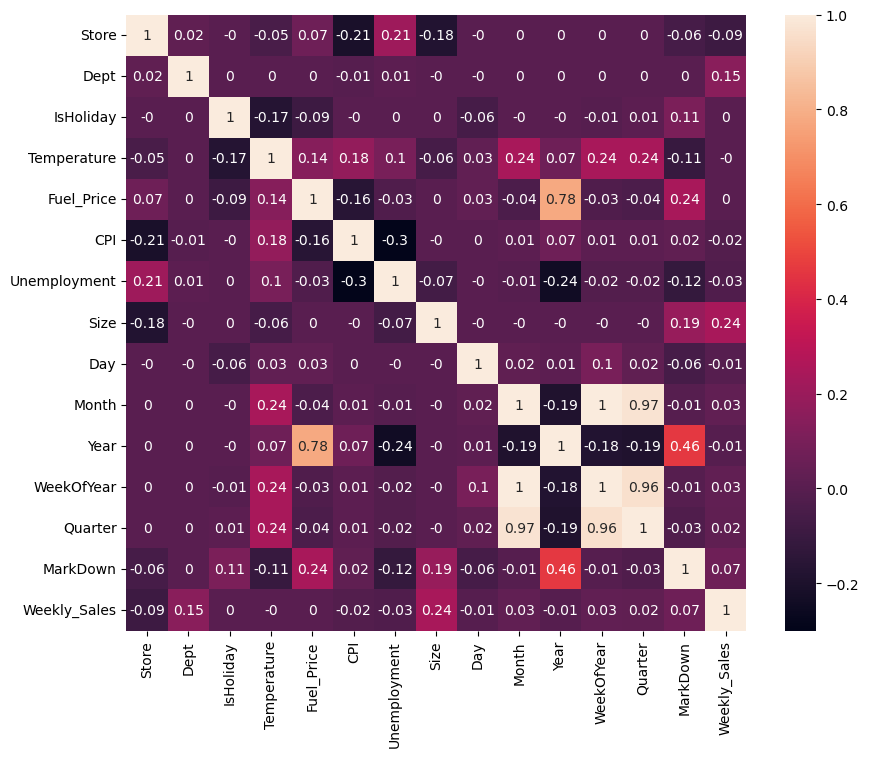

In [34]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10,8)
numeric_cols = ['Store', 'Dept', 'IsHoliday', 'Temperature','Fuel_Price', 'CPI', 'Unemployment', 'Size', 'Day', 'Month','Year', 'WeekOfYear', 'Quarter', 'MarkDown','Weekly_Sales']
sn.heatmap(merged_train[numeric_cols].corr().round(decimals=2), annot = True)

In [35]:
import seaborn as sns

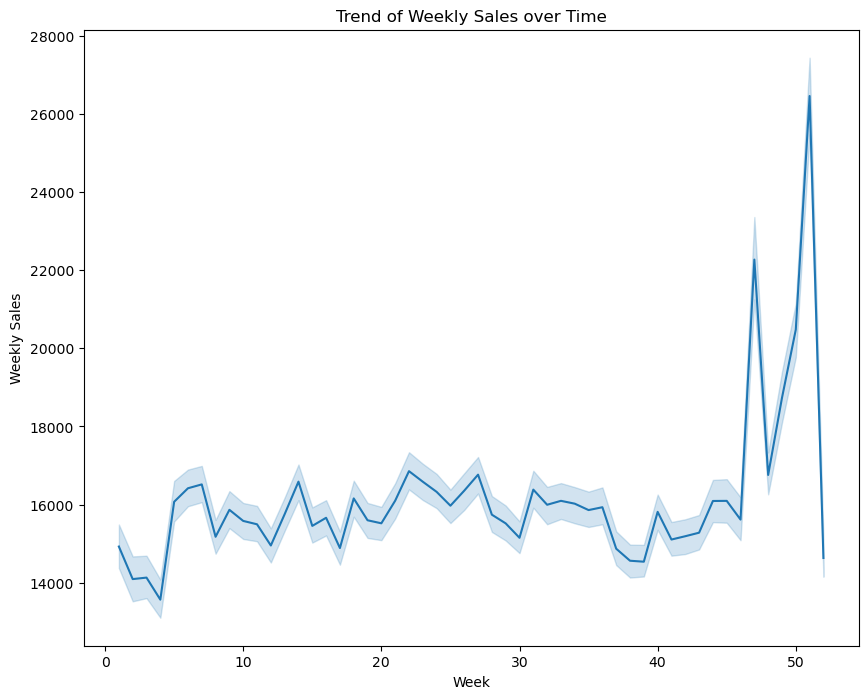

In [36]:
sns.lineplot(data=train__data, x='WeekOfYear', y='Weekly_Sales')
plt.xlabel('Week')
plt.ylabel('Weekly Sales')
plt.title('Trend of Weekly Sales over Time')
plt.show()

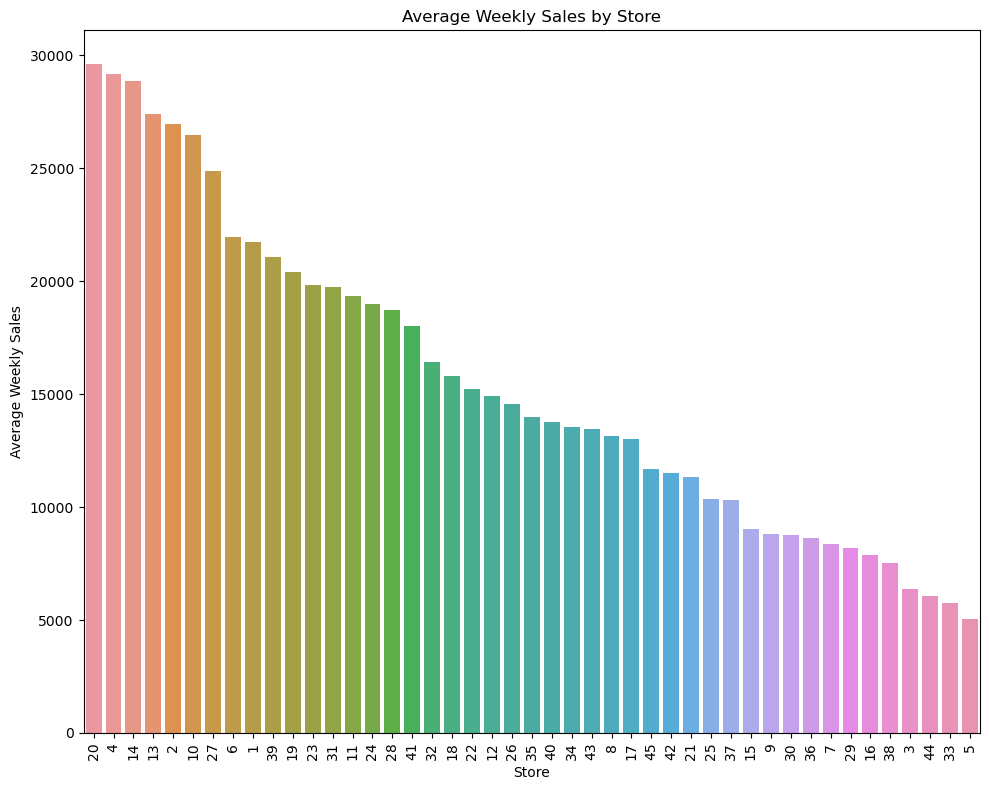

In [37]:
avg_sales_by_store = train__data.groupby('Store')['Weekly_Sales'].mean().reset_index()
sns.barplot(data=avg_sales_by_store, x='Store', y='Weekly_Sales', 
            order = avg_sales_by_store.sort_values('Weekly_Sales',ascending = False)['Store'])
plt.xlabel('Store')
plt.ylabel('Average Weekly Sales')
plt.title('Average Weekly Sales by Store')
plt.xticks(rotation=90)  # Rotate X-axis labels by 45 degrees
plt.tight_layout()  # Adjust layout to prevent label overlapping
plt.show()

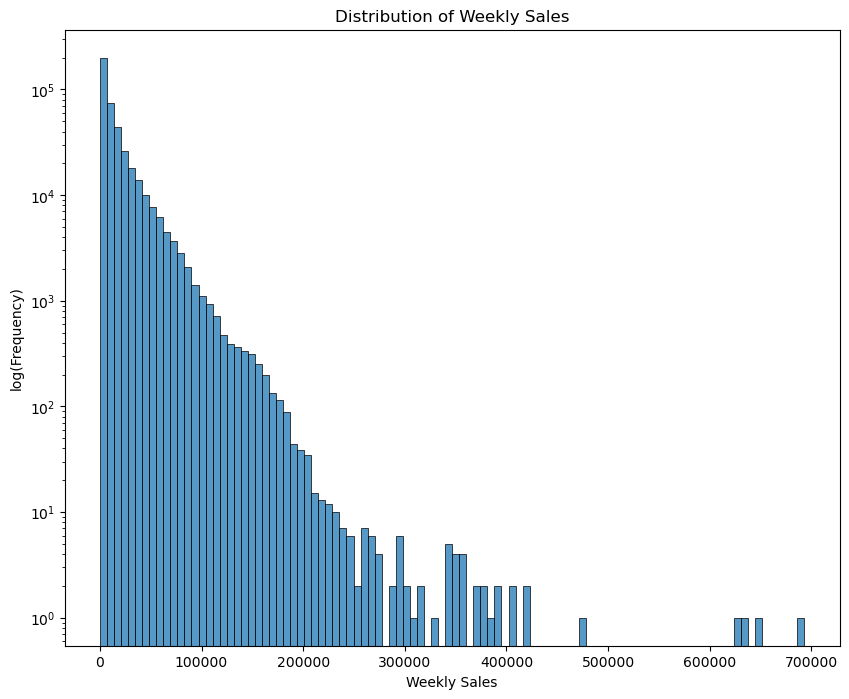

In [38]:
sns.histplot(data=train__data, x='Weekly_Sales', bins=100)
plt.xlabel('Weekly Sales')
plt.ylabel('log(Frequency)')
plt.yscale('log')
plt.title('Distribution of Weekly Sales')
plt.show()

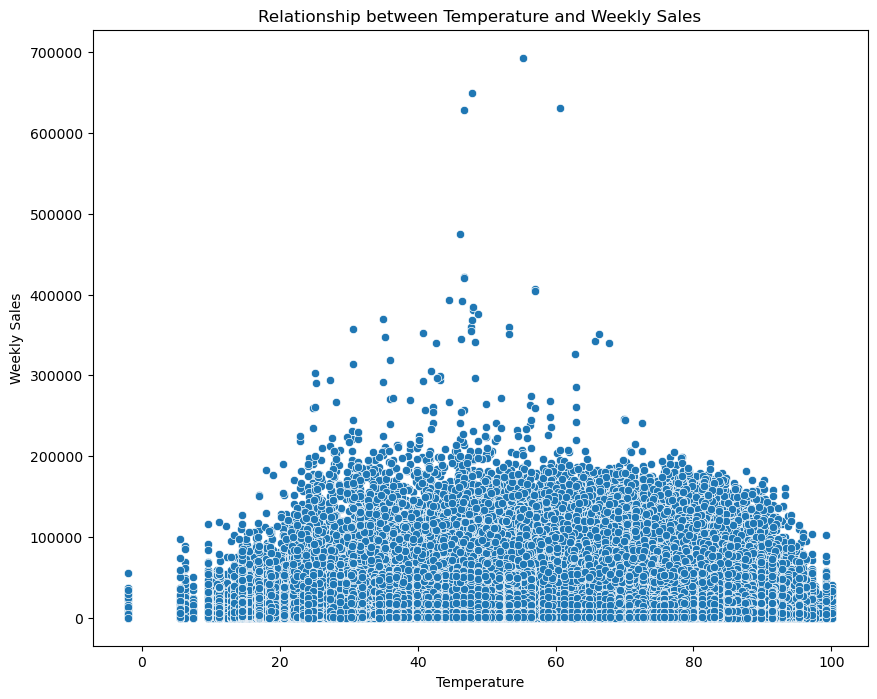

In [39]:
sns.scatterplot(data=train__data, x='Temperature', y='Weekly_Sales')
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.title('Relationship between Temperature and Weekly Sales')
plt.show()

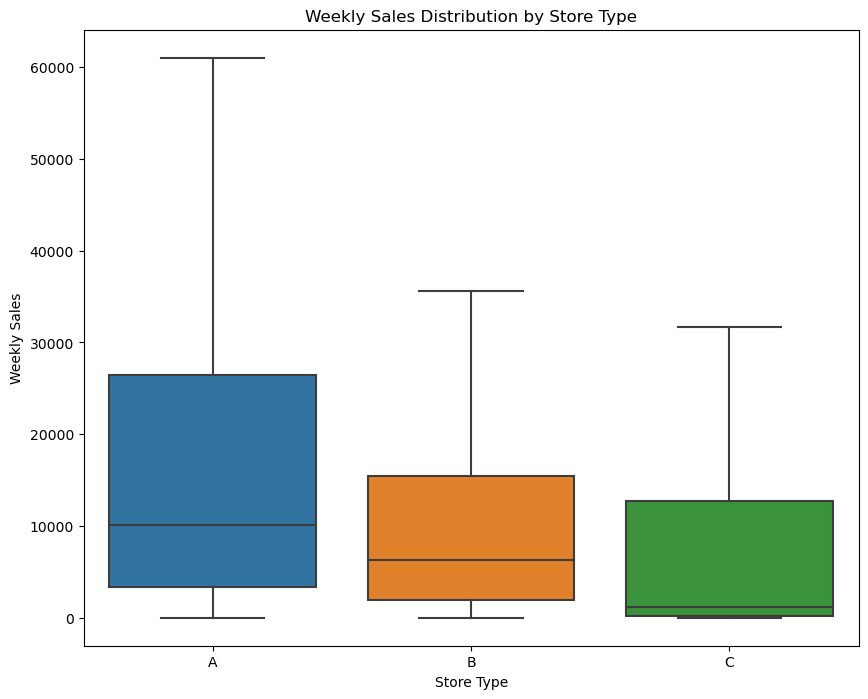

In [40]:
sns.boxplot(data=train__data, x='Type', y='Weekly_Sales',showfliers = False)
plt.xlabel('Store Type')
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales Distribution by Store Type')
plt.show()

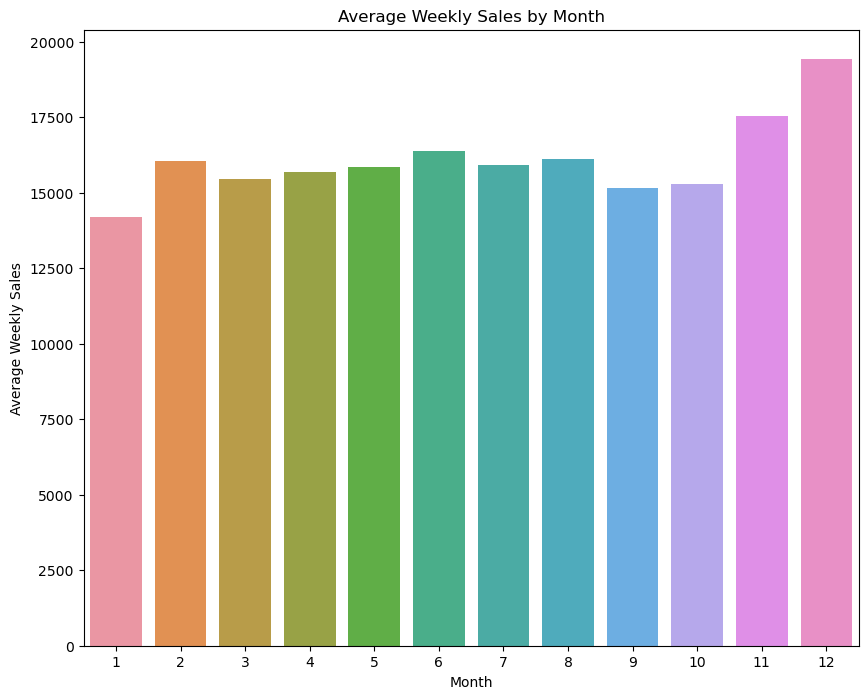

In [41]:
avg_sales_by_month = train__data.groupby('Month')['Weekly_Sales'].mean().reset_index()
sns.barplot(data=avg_sales_by_month, x='Month', y='Weekly_Sales')
plt.xlabel('Month')
plt.ylabel('Average Weekly Sales')
plt.title('Average Weekly Sales by Month')
plt.show()

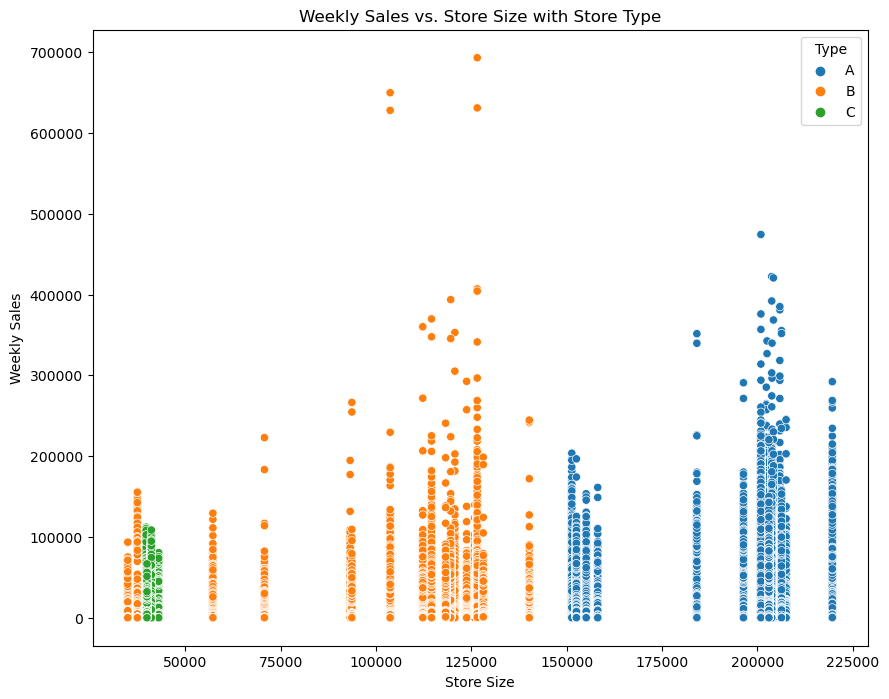

In [42]:
sns.scatterplot(data=train__data, x='Size', y='Weekly_Sales', hue='Type')
plt.xlabel('Store Size')
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales vs. Store Size with Store Type')
plt.show()

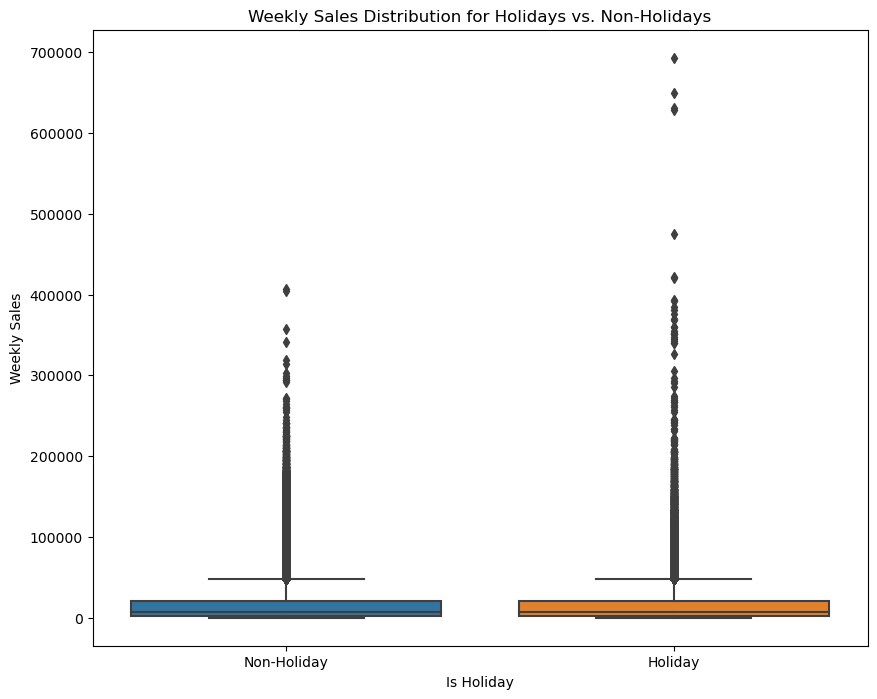

In [43]:
sns.boxplot(data=train__data, x='IsHoliday', y='Weekly_Sales')
plt.xlabel('Is Holiday')
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales Distribution for Holidays vs. Non-Holidays')
plt.xticks([0, 1], ['Non-Holiday', 'Holiday'])
plt.show()

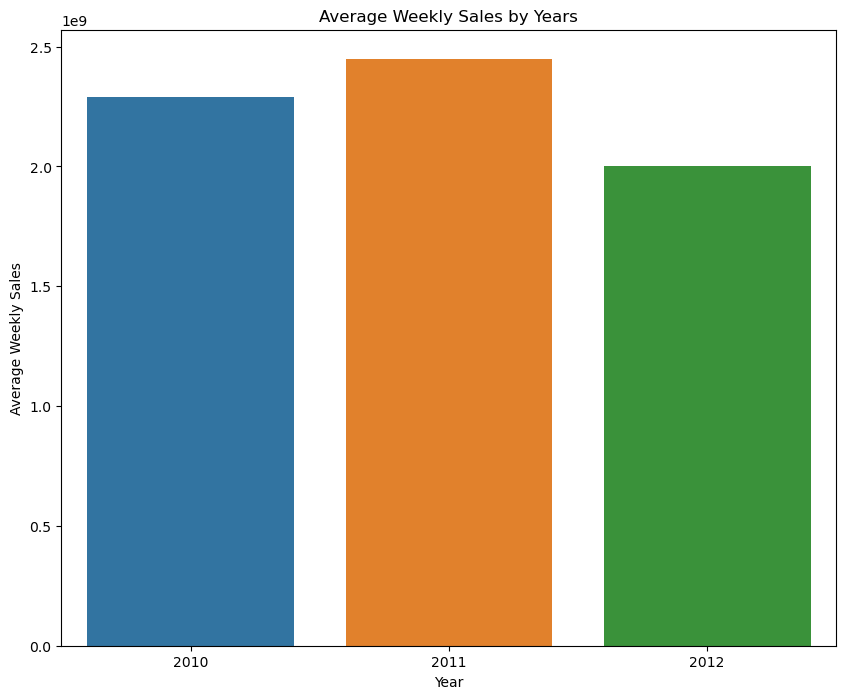

In [44]:
avg_sales_by_year = train__data.groupby('Year')['Weekly_Sales'].sum().reset_index()
# Plot the average weekly sales by years
sns.barplot(data=avg_sales_by_year, x='Year', y='Weekly_Sales')
plt.xlabel('Year')
plt.ylabel('Average Weekly Sales')
plt.title('Average Weekly Sales by Years')
plt.show()

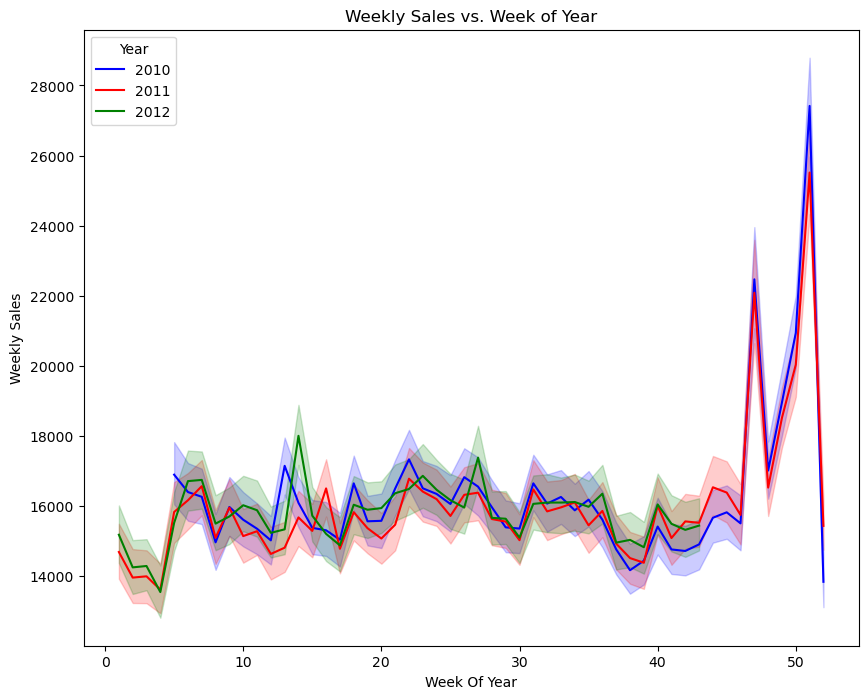

In [45]:
sns.lineplot(train__data, x = 'WeekOfYear', y = 'Weekly_Sales', hue = 'Year', palette = ['blue', 'red', 'green'])
plt.xlabel('Week Of Year')
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales vs. Week of Year')
plt.show()

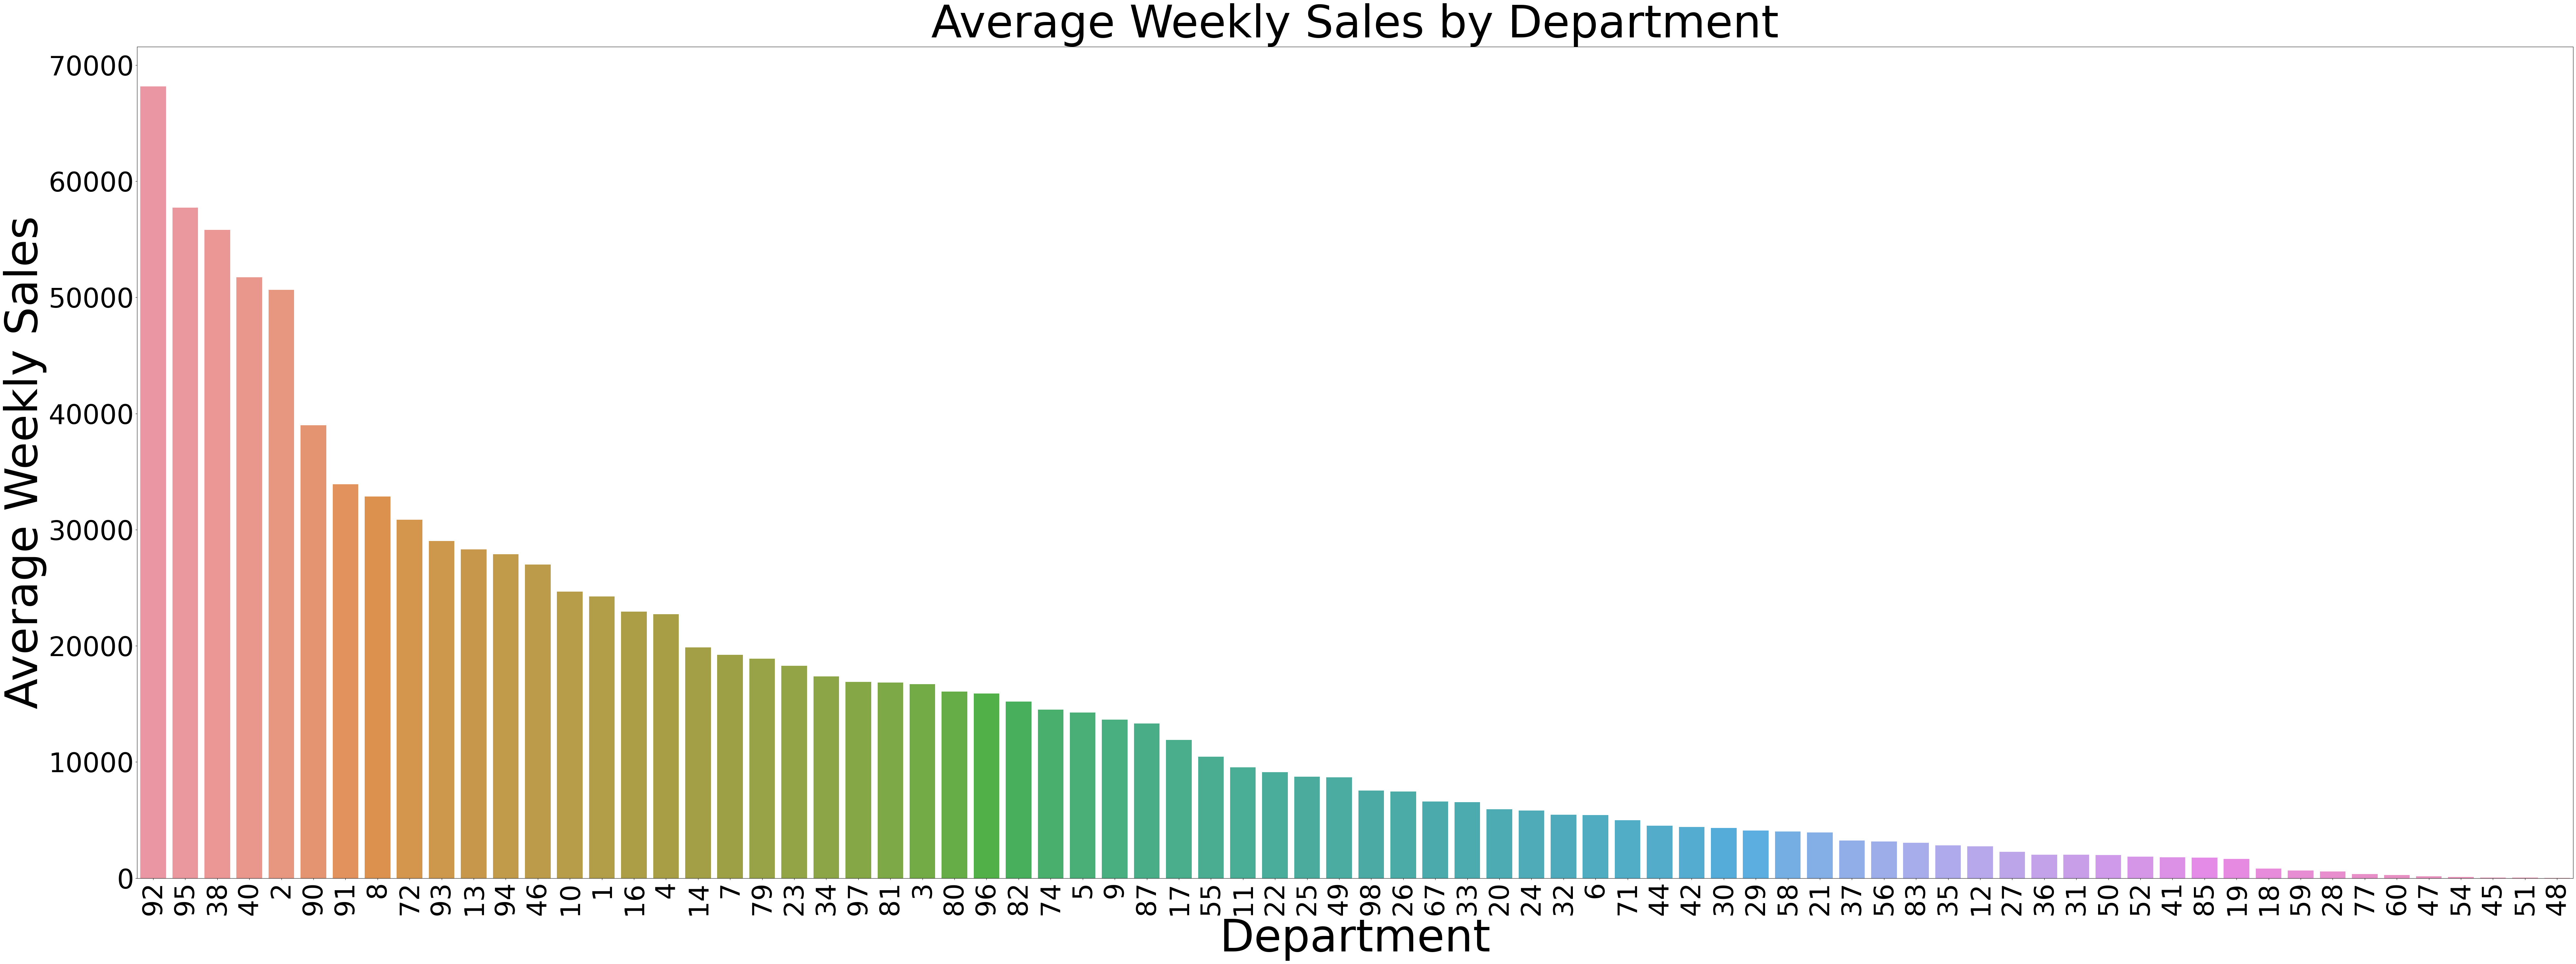

In [46]:
avg_sales_by_store = train_data.sample(1000).groupby(['Dept'])['Weekly_Sales'].mean().reset_index()
plt.figure(figsize = (80,30))
sns.barplot(data=avg_sales_by_store, x='Dept', y='Weekly_Sales', order = avg_sales_by_store.sort_values('Weekly_Sales',ascending = False)['Dept'])
plt.xlabel('Department', fontsize = 100)
plt.ylabel('Average Weekly Sales', fontsize = 100)
plt.title('Average Weekly Sales by Department', fontsize = 100)
plt.yticks(fontsize=60)
plt.xticks(fontsize=60)
plt.xticks(rotation=90)  # Rotate X-axis labels by 45 degrees
plt.tight_layout()  # Adjust layout to prevent label overlapping
plt.show()

In [66]:
train_size = int(.75 * len(train__data))
train_df,val_df = train__data[:train_size], train__data[train_size:]

In [73]:
input_cols = ['Store', 'Dept', 'IsHoliday', 'Temperature','Fuel_Price', 'CPI', 'Unemployment', 'Type', 'Size', 'Day', 'Month','Year', 'WeekOfYear', 'Quarter', 'MarkDown']
target_col = ['Weekly_Sales']

In [74]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

test_inputs = test__data[input_cols].copy()

In [75]:
def num_cat_cols(data):
    
    numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
    categorical_cols = data.select_dtypes('object').columns.tolist()
    
    return numeric_cols, categorical_cols

In [76]:
numeric_cols, categorical_cols = num_cat_cols(train_inputs)

In [77]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
imputer = SimpleImputer(strategy='mean').fit(train_inputs[numeric_cols])
scaler = MinMaxScaler().fit(train_inputs[numeric_cols])
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore').fit(train_inputs[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

X_train = train_inputs[numeric_cols+encoded_cols]
X_val = val_inputs[numeric_cols+encoded_cols]
X_test = test_inputs[numeric_cols+encoded_cols]

In [78]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score

In [79]:
linear_models_scores = {}

In [80]:
def try_linear_models(model_name, model):
    
    model.fit(X_train, train_targets) # training the model on training data
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val) # model predictions on validation data
    
    # Training prediction scores
    train_mae = mean_absolute_error(train_targets, train_preds)
    train_rmse = mean_squared_error(train_targets, train_preds, squared=False)
    train_r2 = r2_score(train_targets, train_preds)
    # validation prediction scores
    val_mae = mean_absolute_error(val_targets, val_preds)
    val_rmse = mean_squared_error(val_targets, val_preds, squared=False)
    val_r2 = r2_score(val_targets, val_preds)
    
    linear_models_scores[model_name] = {'mae':[round(train_mae,2), round(val_mae,2)],'rmse':[round(train_rmse,2), round(val_rmse,2)],'r2':[round(train_r2,2), round(val_r2,2)]}
    
    return val_mae, val_rmse, val_r2

In [81]:
model_names = ['linear', 'ridge', 'lasso', 'elasticnet', 'sgd']
models = [LinearRegression(), Ridge(), Lasso(), ElasticNet(), SGDRegressor()]

for i in range(len(models)):
    
    val_mae, val_rmse, val_r2 = try_linear_models(model_names[i], models[i])

C:\Users\SnappMarket\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [82]:
pd.DataFrame(linear_models_scores)

,linear,ridge,lasso,elasticnet,sgd
mae,"[15328.9, 11626.55]","[15329.04, 11620.76]","[15328.03, 11614.43]","[15574.83, 14093.21]","[15298.74, 11603.27]"
rmse,"[22905.44, 17917.04]","[22905.44, 17922.72]","[22905.45, 17917.56]","[23422.75, 18425.8]","[22906.88, 17927.71]"
r2,"[0.08, 0.03]","[0.08, 0.03]","[0.08, 0.03]","[0.04, -0.02]","[0.08, 0.03]"


In [85]:
# Install the required libraries
!pip install xgboost
!pip install lightgbm

# Verify the installation
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor


  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/a2/48/d5da8591891327b0faf08179d420fba3893c6134bdd449497c5329e4cb01/xgboost-2.1.0-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 163.8 kB/s eta 0:12:43
   ---------------------------------------- 0.0/124.9 MB 178.6 kB/s eta 0:11:40
   ---------------------------------------- 0.1/124.9 MB 261.4 kB/s eta 0:07:58
   ---------------------------------------- 0.1/124.9 MB 399.4 kB/s eta 0:05:13
   ---------------------------------------- 0.2/124.9 MB 523.5 kB/s eta 0:03:59
   ---------------------------------------- 0.3/124.9 MB 655.4 kB/s eta 0:03:11
   ----------------------------

  Obtaining dependency information for lightgbm from https://files.pythonhosted.org/packages/ca/b4/57f3f253721e0a16ea28c49acca92c5b1198eb94fbbb8328d6dabc61d2e0/lightgbm-4.4.0-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.4 MB 393.8 kB/s eta 0:00:04
   -- ------------------------------------- 0.1/1.4 MB 655.4 kB/s eta 0:00:03
   --- ------------------------------------ 0.1/1.4 MB 774.0 kB/s eta 0:00:02
   ------ --------------------------------- 0.2/1.4 MB 981.9 kB/s eta 0:00:02
   ------- -------------------------------- 0.3/1.4 MB 1.0 MB/s eta 0:00:02
   --------- ------------------------------ 0.4/1.4 MB 1.1 MB/s eta 0:00:01
   ----------- ---------------------------- 0.4/1.4 MB 1.1 MB/s eta 0:00:01
   --------------- ------------------------ 0.6/1.4 MB 1.4 MB/s eta 0:00:01
   -------------------- ---------------

In [86]:
rf_scores = {}
gb_scores = {}
ab_scores = {}
xgb_scores = {}
lgbm_scores = {}
trained_models = {}

In [87]:
def try_ensemble_methods(model_name, model, score_dict):
    
    model.fit(X_train, train_targets.values.ravel())
    
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)
    
    # Training prediction scores
    train_mae = mean_absolute_error(train_targets, train_preds)
    train_rmse = mean_squared_error(train_targets, train_preds, squared=False)
    train_r2 = r2_score(train_targets, train_preds)
    # validation prediction scores
    val_mae = mean_absolute_error(val_targets, val_preds)
    val_rmse = mean_squared_error(val_targets, val_preds, squared=False)
    val_r2 = r2_score(val_targets, val_preds)
    
    score_dict['mae'] = {'training':round(train_mae,2), 'validation': round(val_mae,2)}
    score_dict['rmse'] = {'training':round(train_rmse,2), 'validation': round(val_rmse,2)}
    score_dict['r2'] = {'training':round(train_r2,2), 'validation': round(val_r2,2)}
    
    trained_models[model_name] = model
    
    return val_mae, val_rmse, val_r2

In [88]:
ensemble_models = [RandomForestRegressor(random_state=42, n_jobs=-1),
                  GradientBoostingRegressor(random_state=42),
                  AdaBoostRegressor(random_state=42),
                  XGBRegressor(random_state=42, n_jobs=-1),
                  LGBMRegressor(random_state=42, n_jobs=-1)]
ensemble_model_names = ['random_forest','gradient_boosting',
                       'adaboost','xgboost','lightgbm']
score_dicts = [rf_scores,gb_scores, ab_scores, xgb_scores, lgbm_scores]


for i in range(5):
    
    val_mae, val_rmse, val_r2 = try_ensemble_methods(ensemble_model_names[i], ensemble_models[i], score_dicts[i])
    print("*********")
    print(ensemble_model_names[i])
    print("Val MAE: ", val_mae)
    print("Val RMSE: ", val_rmse)
    print("Val R2: ", val_r2)

*********
random_forest
Val MAE:  5812.071677087755
Val RMSE:  11197.476573968932
Val R2:  0.6228394992582307
*********
gradient_boosting
Val MAE:  6164.839807645451
Val RMSE:  10973.095335630951
Val R2:  0.6378035549339194
*********
adaboost
Val MAE:  22278.676658729004
Val RMSE:  26438.746633821043
Val R2:  -1.1026529871630943
*********
xgboost
Val MAE:  6121.844831244776
Val RMSE:  10807.731300604473
Val R2:  0.6486378659309807
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003764 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1151
[LightGBM] [Info] Number of data points in the train set: 315159, number of used features: 10
[LightGBM] [Info] Start training from score 17131.913416
*********
lightgbm
Val MAE:  5593.7915220122695
Val RMSE:  9982.78719407462
Val R2:  0.7002290770482122
